# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


# Exploratory Data Analysis

In [3]:
df.shape

(700, 2)

- Dataset consists of 700 observations and 2 characteristics.
- Out of the 2 characteristics, one - 'x' - is the independent variable and the other - 'y' - is the dependent variable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


- Data only has float values.
- The 'y' column has 1 null/missing a value.

# Summary Statistics

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,700.0,54.985939,134.681703,0.000000,25.000000,49.00000,75.000000,3530.157369
y,699.0,49.939869,29.109217,-3.839981,24.929968,48.97302,74.929911,108.871618


- Mean and median values for both characteristics are relatively close.
- Notably large difference in 75th %tile and max value of 'x' column.

# Data Visualization

# Visualizing Missing Values

<AxesSubplot:>

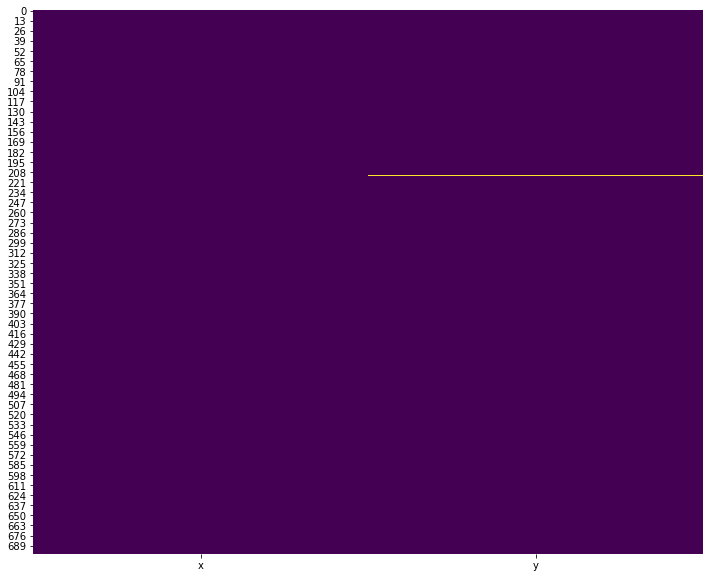

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cbar=False,cmap ='viridis')

- The different color shade on the purple background represents the missing value in the 'y' column.

# Visualizing Correlation

<AxesSubplot:>

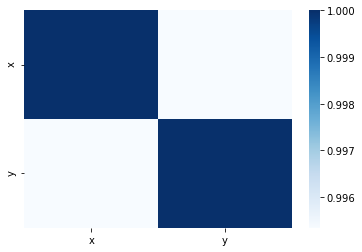

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

- This is not a great dataset for visualizing correlation because the variables are highly correlated and there is only 2 variables.
- The dark shade represents perfect correlation because any variable is perfectly correlated with itself.
- The ligher shade represents a correlation of approximately 0.996.

# Visualizing Data Trend

<AxesSubplot:xlabel='x', ylabel='y'>

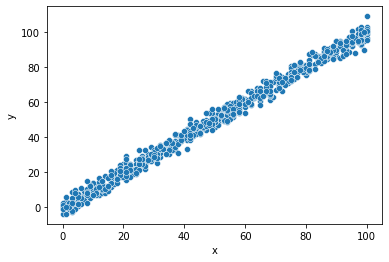

In [8]:
sns.scatterplot(x='x',y='y',data=df)

- The dataset follows a linear trend hence linear regression is appropriate for the dataset.
- There isn't any value in the set that might be an outlier.

# Dealing with null/missing values

In [9]:
df.isnull().sum()

x    0
y    1
dtype: int64

- Since there is only 1 row that is missing a value and the set consists of 700 observations, it wouldn't alter the model too much if the row is dropped 

In [10]:
df = df.dropna()
df.isnull().sum()

x    0
y    0
dtype: int64

In [11]:
df.shape

(699, 2)

- The dataset now consists of 699 observations, 2 characteristics, and no missing values.

# Building a Linear Regression Model

<strong>Note:</strong> I will build the model in 2 separate parts - 1) I will do all the calculations on a step-by-step basis to come up with the linear regression model manually; 2) In the second part, I will use the scikit-learn library to build a linear regression model.

# Part 1: Building the Model Manually

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train, test = train_test_split(df, test_size=0.3)

- I have split the dataset into 2 dataframes.
- The train dataframe will be used to build a model whereas the test dataset will be used to test the accuracy of the model.

<strong>Simple linear regression model equation</strong>
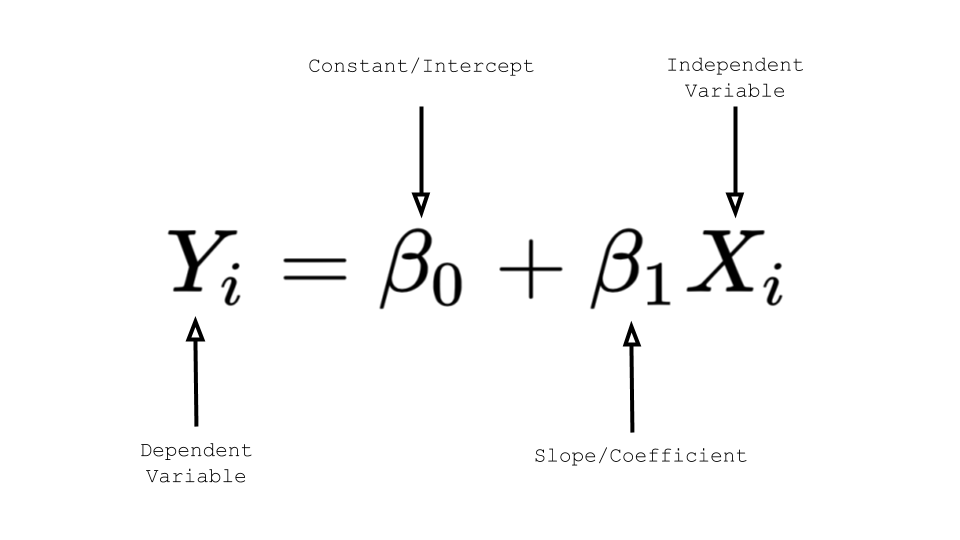

<strong>Furthermore, the equation to calculate the coefficient and intercept is:</strong>
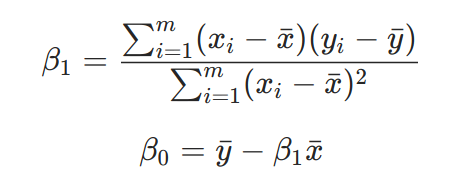

- (xi - x̄) refers to subtracting the mean of x from each value of x, likewise (yi - ȳ) refers to subtracting the mean of y from each individual value of y.
- Σ(xi - x̄)(yi - ȳ) refers to multiplying the results of (xi - x̄) and (yi - ȳ) and then summing it up.
- Then, we take the results of Σ(xi - x̄)(yi - ȳ) and divide by (xi - x̄)^2.

In [14]:
x_mean = train['x'].mean()
y_mean = train['y'].mean()

- x_mean and y_mean is a variable that stores the mean of each column.

In [15]:
x_mean

50.67893660531697

In [16]:
y_mean

50.61555373364213

In [17]:
train['x_deviation'] = train['x'].apply(lambda x: x - x_mean)
train['y_deviation'] = train['y'].apply(lambda x: x - y_mean)
train.head(10)

<ipython-input-17-254b3dbb43e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x_deviation'] = train['x'].apply(lambda x: x - x_mean)
<ipython-input-17-254b3dbb43e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_deviation'] = train['y'].apply(lambda x: x - y_mean)


,x,y,x_deviation,y_deviation
3,38.0,36.586398,-12.678937,-14.029156
253,11.0,9.199955,-39.678937,-41.415599
265,51.0,48.380884,0.321063,-2.234670
275,81.0,81.289607,30.321063,30.674054
476,49.0,48.433079,-1.678937,-2.182475
236,83.0,87.220597,32.321063,36.605043
681,52.0,52.733898,1.321063,2.118344
9,5.0,6.963319,-45.678937,-43.652235
512,16.0,15.561355,-34.678937,-35.054199
218,84.0,83.128617,33.321063,32.513063


- The x_deviation column subtracts the mean of x from the x value of that row; the y_deviation column does the samething for the y variable.
- The new columns tells us how much each x and y obsevation deviates from its mean.
- Positive numbers represents being above the mean and negative numbers represents being below the mean.

In [18]:
train['x_deviation * y_deviation'] = train['x_deviation'] * train['y_deviation']
train.head(10)

<ipython-input-18-459ec5281203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x_deviation * y_deviation'] = train['x_deviation'] * train['y_deviation']


,x,y,x_deviation,y_deviation,x_deviation * y_deviation
3,38.0,36.586398,-12.678937,-14.029156,177.874776
253,11.0,9.199955,-39.678937,-41.415599,1643.326928
265,51.0,48.380884,0.321063,-2.234670,-0.717471
275,81.0,81.289607,30.321063,30.674054,930.069928
476,49.0,48.433079,-1.678937,-2.182475,3.664237
236,83.0,87.220597,32.321063,36.605043,1183.113917
681,52.0,52.733898,1.321063,2.118344,2.798467
9,5.0,6.963319,-45.678937,-43.652235,1993.987660
512,16.0,15.561355,-34.678937,-35.054199,1215.642331
218,84.0,83.128617,33.321063,32.513063,1083.369829


- The new column, 'x_deviation * y_deviation', is simply the product of two previous columns.
- By having this column, it makes it easier to calculate Σ(xi - x̄)(yi - ȳ).

In [19]:
train['x_deviation-squared'] = train['x_deviation'].apply(lambda x: x**2)
train.head(10)

<ipython-input-19-190c76c1d4c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['x_deviation-squared'] = train['x_deviation'].apply(lambda x: x**2)


,x,y,x_deviation,y_deviation,x_deviation * y_deviation,x_deviation-squared
3,38.0,36.586398,-12.678937,-14.029156,177.874776,160.755433
253,11.0,9.199955,-39.678937,-41.415599,1643.326928,1574.418010
265,51.0,48.380884,0.321063,-2.234670,-0.717471,0.103082
275,81.0,81.289607,30.321063,30.674054,930.069928,919.366885
476,49.0,48.433079,-1.678937,-2.182475,3.664237,2.818828
236,83.0,87.220597,32.321063,36.605043,1183.113917,1044.651139
681,52.0,52.733898,1.321063,2.118344,2.798467,1.745208
9,5.0,6.963319,-45.678937,-43.652235,1993.987660,2086.565249
512,16.0,15.561355,-34.678937,-35.054199,1215.642331,1202.628644
218,84.0,83.128617,33.321063,32.513063,1083.369829,1110.293266


- The 'x_deviation-squared' column is taking each x_deviation value and squaring it.
- This makes it easier to calculate (xi - x̄)^2.
- With this, everything required to calculate the coefficient is there.

In [20]:
coef = train['x_deviation * y_deviation'].sum() / train['x_deviation-squared'].sum()
coef

1.0014327147509705

- I am dividing Σ(xi - x̄)(yi - ȳ) by (xi - x̄)^2 which, as shown above, is the formula for the coefficient.
- The coefficient tells us how much the y variable will increase by (since the coefficient is positive) given a 1 unit increase in x.

In [21]:
intercept = y_mean - (coef*x_mean)
intercept

-0.13599133171277344

- The formula for the intercept is: ȳ - (coef * x̄)
- This tells us the value of y when x = 0.

In [22]:
print(f'The linear regression model is: {intercept} + {coef}x')

The linear regression model is: -0.13599133171277344 + 1.0014327147509705x


Now that the linear regression model has been determined, it can be used to predict values and measure the accuracy of the model

# Predicting values using the linear regression model

To predict values and measure the accuracy of the model, the <strong>test</strong> dataset will be used!

In [23]:
test.head(10)

,x,y
71,64.0,66.734661
481,86.0,88.572517
415,81.0,78.870977
689,87.0,89.137550
441,17.0,19.304865
33,0.0,0.329089
280,60.0,56.991789
183,44.0,45.675626
7,81.0,80.763399
258,35.0,33.925620


In [24]:
test['predicted_y'] = test['x'].apply(lambda a: intercept + (coef*a))
test.head(10)

<ipython-input-24-fb3bebfe6e89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_y'] = test['x'].apply(lambda a: intercept + (coef*a))


,x,y,predicted_y
71,64.0,66.734661,63.955702
481,86.0,88.572517,85.987222
415,81.0,78.870977,80.980059
689,87.0,89.137550,86.988655
441,17.0,19.304865,16.888365
33,0.0,0.329089,-0.135991
280,60.0,56.991789,59.949972
183,44.0,45.675626,43.927048
7,81.0,80.763399,80.980059
258,35.0,33.925620,34.914154


- The 'y' column shows the actual values of y.
- The 'predicted_y' column shows the predicted value of y - these values are derived from the linear regression model.

# Model Evaluation Metrics

There are 4 metrics that will be of concern for this specific example:
1. Mean absolute error (MAE) - the average distance between the predicted and actual value of y.
2. Mean squared error (MSE) - Similar to MAE, but distance between predicted and actual values are squared. MSE is preferred to MAE because it punishes larger errors.
3. Root mean squared error (RMSE) - the square root of MSE. This metric is preferred to MSE because it is interpretable in terms of the dependent variable. 
4. R-squared - relative measure of fit. Tells us what percentage of the variance in the dependent variable can be explained by the independent variable/s. 

In [25]:
test['error'] = abs(test['y'] - test['predicted_y'])
test.head(10)

<ipython-input-25-f3d6a876dde6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = abs(test['y'] - test['predicted_y'])


,x,y,predicted_y,error
71,64.0,66.734661,63.955702,2.778958
481,86.0,88.572517,85.987222,2.585295
415,81.0,78.870977,80.980059,2.109081
689,87.0,89.137550,86.988655,2.148895
441,17.0,19.304865,16.888365,2.416501
33,0.0,0.329089,-0.135991,0.465081
280,60.0,56.991789,59.949972,2.958183
183,44.0,45.675626,43.927048,1.748578
7,81.0,80.763399,80.980059,0.216660
258,35.0,33.925620,34.914154,0.988534


In [26]:
mae = test['error'].sum()/len(test)
mae

2.3005206961680265

- The mean absolute error is approximately 2.3 which means, on average, the predicted value of y is off by 2.3 from the actual value of y.

In [27]:
test['error_squared'] = test['error'].apply(lambda x: x**2)
test.head(10)

<ipython-input-27-a5d7dd22ce29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error_squared'] = test['error'].apply(lambda x: x**2)


,x,y,predicted_y,error,error_squared
71,64.0,66.734661,63.955702,2.778958,7.722610
481,86.0,88.572517,85.987222,2.585295,6.683750
415,81.0,78.870977,80.980059,2.109081,4.448224
689,87.0,89.137550,86.988655,2.148895,4.617749
441,17.0,19.304865,16.888365,2.416501,5.839475
33,0.0,0.329089,-0.135991,0.465081,0.216300
280,60.0,56.991789,59.949972,2.958183,8.750846
183,44.0,45.675626,43.927048,1.748578,3.057524
7,81.0,80.763399,80.980059,0.216660,0.046942
258,35.0,33.925620,34.914154,0.988534,0.977200


In [28]:
mse = test['error_squared'].sum()/len(test)
mse

8.496154216737885

- The average squared difference between the actual value and the predicted value is approximately 8.5

In [29]:
rmse = mse**0.5
rmse

2.91481632641542

- Similar to MAE, this value represents the average distance between the actual and predicted value of y. 
- This metric is preferred to MSE because the result is interpretable in terms of the depedent variable, 2.9 is the average distance of actual y value from the regression line.

To manually calculate the coefficient of determination (R-squared), the following are needed:
- SST: Total sum of squares = Σ(Yi – mean of Y)^2
- SSE: Sum of squared error (this is already calculate in the 'error_squared' column)
- This is because R-squared = 1 - (SSE/SST)

In [30]:
y_mean = test['y'].mean()
test['y-y_mean'] = test['y'].apply(lambda x: (x - y_mean)**2)
test.head(10)

<ipython-input-30-96d9366715d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y-y_mean'] = test['y'].apply(lambda x: (x - y_mean)**2)


,x,y,predicted_y,error,error_squared,y-y_mean
71,64.0,66.734661,63.955702,2.778958,7.722610,337.389721
481,86.0,88.572517,85.987222,2.585295,6.683750,1616.524666
415,81.0,78.870977,80.980059,2.109081,4.448224,930.523772
689,87.0,89.137550,86.988655,2.148895,4.617749,1662.279352
441,17.0,19.304865,16.888365,2.416501,5.839475,844.577986
33,0.0,0.329089,-0.135991,0.465081,0.216300,2307.591795
280,60.0,56.991789,59.949972,2.958183,8.750846,74.395788
183,44.0,45.675626,43.927048,1.748578,3.057524,7.240747
7,81.0,80.763399,80.980059,0.216660,0.046942,1049.559726
258,35.0,33.925620,34.914154,0.988534,0.977200,208.538719


In [31]:
sst = test['y-y_mean'].sum()
sst

163940.75982808077

- SST is a measure of y's variability around its mean. It takes the distance from the mean of y to an actual value of y and squares it - this is done for each value of y - and then its all summed up to produce SST.
- SST represents the total error in the dataset, its what the model's error would be if we were to use y's mean as the regression line.
- The ponit of linear regression is to produce a line that reduces this error as much as possible.

In [32]:
sse = test['error_squared'].sum()
sse

1784.1923855149557

- SSE is a measure of y's variability around the regression line.
- The lower SSE is, the better the regression line fits the data.
- The SSE is very low as compared to SST, this is essentially the whole point of linear regression: to reduce SSE as much as possible.

In [33]:
r_squared = 1 - (sse/sst)
r_squared

0.989116846918448

- The coefficient of determination (R-squared) describes the percentage of the variation in the dependent variable that can be explained by the independent variable/s. 
- R-squared is a value between 0 and 1. Where a value closer to 0 means the independent variable/s do not explain any variation in the dependent variable, and a value closer to 1 means the independent variable/s explain all of the variation in the dependent variable.
- With this specific model, R-squared is approximately equal to 1 which means (nearly) all the variation in y is explained by x.

# Visualizing actual values of y and predicted values of y

<AxesSubplot:xlabel='x', ylabel='predicted_y'>

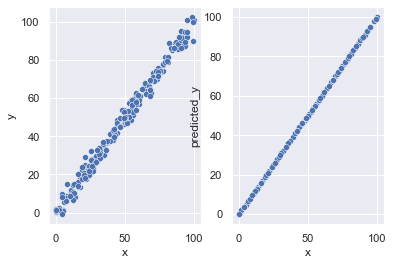

In [34]:
sns.set()
fig, axes = plt.subplots(1, 2)
sns.scatterplot(data=test, x='x', y='y', ax=axes[0])
sns.scatterplot(data=test, x='x', y='predicted_y', ax=axes[1])

- Visually, it can be deduced that the model is very accurate.

C:\Users\obaid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

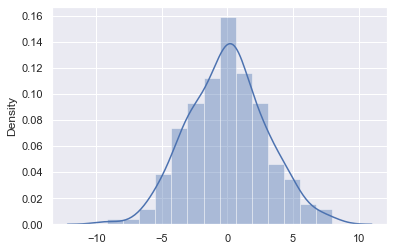

In [47]:
sns.distplot((test['y'] - test['predicted_y']))

- This is a plot of the residual (y - predicted_y)
- A normal distribution is indicative of a model that fits well.
- If this wasn't a normal distribution, the model would have to be modified. 

# Part 2: Building the Model using the Scikit-Learn Library

In this part, I am going to do exactly the same thing I did in part 1 (build and evaluate a regression model) using scikit-learn as opposed to manually calculating everything.

In [35]:
X_train = train['x'].values.reshape(-1,1)
X_test = test['x'].values.reshape(-1,1)
y_train = train['y'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)

- The train/test dataset remains the same as the first part.

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

- Instantiating and fitting the model

In [38]:
print(lm.intercept_)
print(lm.coef_)

[-0.13599133]
[[1.00143271]]


- The coefficient and slope produced here is exactly the same as the slope and coefficient produced in part 1. 

# Predicting Values using the Linear Regression Model

In [39]:
predictions = lm.predict(X_test)
predictions

array([[ 63.95570241],
       [ 85.98722214],
       [ 80.98005856],
       [ 86.98865485],
       [ 16.88836482],
       [ -0.13599133],
       [ 59.94997155],
       [ 43.92704812],
       [ 80.98005856],
       [ 34.91415368],
       [ 23.89839382],
       [ -0.13599133],
       [ 50.93707712],
       [ 20.89409568],
       [ 72.96859685],
       [ 12.88263396],
       [ 81.98149128],
       [ 48.93421169],
       [ 36.91701911],
       [ 18.89123025],
       [ 86.98865485],
       [ 83.98435671],
       [ 13.88406667],
       [ 53.94137526],
       [ 23.89839382],
       [  4.87117224],
       [ 57.94710612],
       [ 15.8869321 ],
       [ 50.93707712],
       [ 57.94710612],
       [ 47.93277898],
       [ 85.98722214],
       [ 31.90985554],
       [ 16.88836482],
       [ 68.96286599],
       [ 26.90269197],
       [ 77.97576042],
       [ 43.92704812],
       [ 47.93277898],
       [ 20.89409568],
       [ 21.89552839],
       [ 48.93421169],
       [ 24.89982654],
       [ 18

- Now that a predictions column as been generated, it can be used to evaluate the model's accuracy.

# Evaluating the Model

In [40]:
from sklearn import metrics

In [41]:
metrics.mean_absolute_error(y_test, predictions)

2.3005206961680265

In [42]:
metrics.mean_squared_error(y_test, predictions)

8.496154216737885

In [43]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.91481632641542

In [44]:
metrics.r2_score(y_test, predictions)

0.989116846918448

- The metrics used in this part are the same as the metrics used in part 1. 
- SST and SSE did not have to be calculated in order to calculate R-squared.
- The values of the metrics in this part are exactly the same (give or take a few decimal values) as the value of the metrics in part 1 where values were calculated manually.

# Conclusion

- Due to the simplicity of the dataset, its analysis is not meant to provide a statistical insight about the data.
- The analysis of this dataset is meant to explain concepts of linear regression, and how its various components are calculated both manually and using the scikit-learn library.